# scikit-learn入门

* 准备数据集

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
X = np.random.randint(0, 100, (10, 4))
y = np.random.randint(0, 3, 10)
y.sort()

print '样本：'
print X
print '标签：', y

样本：
[[87 43 10 17]
 [96 93 96 78]
 [34  8 43 28]
 [71  0 29 14]
 [15 11 38 59]
 [84 78 51  9]
 [38 99 31 90]
 [24 60 74 53]
 [39 28 74 34]
 [70 19 90 64]]
标签： [0 0 0 0 1 1 2 2 2 2]


In [17]:
# 分割训练集、测试集
# random_state确保每次随机分割得到相同的结果
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3., random_state=7) 

print '测试集：'
print X_train
print y_train

print '训练集：'
print X_test
print y_test

测试集：
[[96 93 96 78]
 [70 19 90 64]
 [24 60 74 53]
 [71  0 29 14]
 [38 99 31 90]
 [15 11 38 59]]
[0 2 2 0 2 1]
训练集：
[[39 28 74 34]
 [84 78 51  9]
 [87 43 10 17]
 [34  8 43 28]]
[2 1 0 0]


In [32]:
# 特征归一化
from sklearn import preprocessing

x1 = np.random.randint(0, 1000, 5).reshape(5,1)
x2 = np.random.randint(0, 10, 5).reshape(5, 1)
x3 = np.random.randint(0, 100000, 5).reshape(5, 1)

X = np.concatenate([x1, x2, x3], axis=1)
print X

[[  285     2 95128]
 [  820     1 41397]
 [  325     5  2694]
 [  399     4 55383]
 [  722     5 70151]]


In [33]:
print preprocessing.scale(X)

[[-1.03173703 -0.86164044  1.36987056]
 [ 1.41932563 -1.47709789 -0.37524685]
 [-0.84848001  0.98473193 -1.63227314]
 [-0.50945452  0.36927447  0.07900139]
 [ 0.97034593  0.98473193  0.55864804]]


C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


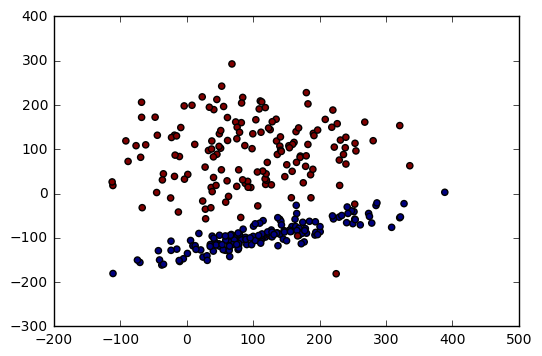

In [8]:
# 生成分类数据进行验证scale的必要性
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, 
                           random_state=25, n_clusters_per_class=1, scale=100)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [57]:
from sklearn import svm

X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3., random_state=7) 
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)
svm_classifier.score(X_test, y_test)

0.97999999999999998

* 训练模型

In [20]:
# 回归模型
from sklearn import datasets

boston_data = datasets.load_boston()
X = boston_data.data
y = boston_data.target

print '样本：'
print X[:5, :]
print '标签：'
print y[:5]

样本：
[[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
    5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
    1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
    4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   6.42100000e+00   7.89000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.96900000e+02
    9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   7.18500000e+00   6.11000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.92830000e+02
    4.03000000e+00]
 [  3.23700000e-02   0.00000000e+00   2.18000000e+00   0.00000000e+00
    4.58000000e-01   6.99800000e+00   4.58000000e+01   6.06220000e+00
    3.00000000e+00   2.22000000e+02   1.87000000e+01   3.94630000e+02
    2.94000000e+00]
 [  6.90500000e-02   0.00000000e+00   2.18000000e+00   0.00000000e+00
    4.

In [24]:
# 选择线性回顾模型
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [25]:
from sklearn.model_selection import train_test_split

# 分割训练集、测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3., random_state=7) 

In [26]:
# 训练模型
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# 返回参数
lr_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [28]:
lr_model.score(X_train, y_train)

0.75967081116060942

In [29]:
lr_model.score(X_test, y_test)

0.66980061222857723

* 交叉验证

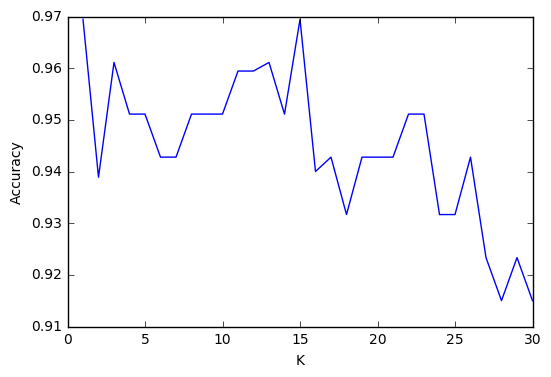

In [34]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3., random_state=5) 

k_range = range(1, 31)
cv_scores = []
for n in k_range:
    knn = KNeighborsClassifier(n)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy') # 分类问题使用
    #scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error') # 回归问题使用
    cv_scores.append(scores.mean())
    
plt.plot(k_range, cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [36]:
# 选择最优的K
best_knn = KNeighborsClassifier(15)
best_knn.fit(X_train, y_train)
print best_knn.score(X_test, y_test)
print best_knn.predict(X_test)

1.0
[1 2 2 0 2 1 0 1 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2 0 1 1 0 1 0 0
 2 0 2 2 1 0 0 1 2 1 2 2 0]
